In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, datasets

In [31]:
mnist = datasets.mnist

In [32]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [33]:
#제발 잊지말자 기억해!!!!! 채널!!!!!!
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [34]:
#노멀라이즈
x_train, x_test =  x_train/255.0, x_test/255.0

In [35]:
#tf.data 사용

train_ds= tf.data.Dataset.from_tensor_slices((x_train, y_train)) # 데이터셋

In [36]:
train_ds = train_ds.shuffle(1000) #1000정도가 적당하다고 함
train_ds = train_ds.batch(32) #배치 사이즈만큼 데이터가 나옴 

In [37]:
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

# Visualize Data 

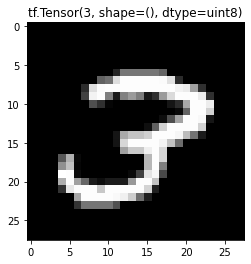

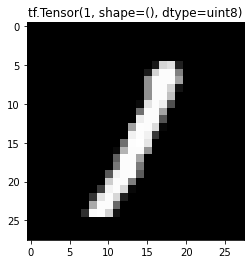

In [41]:
#데이터를 보기위해서 take를 씀 
for image, label in train_ds.take(2): #두개만 가져옴
    plt.title(str(label[0]))
    plt.imshow(image[0,:,:,0], 'gray')
    plt.show()

In [40]:
#이렇게 하면 하나만 가져올 수 있음 
image, label = next(iter(train_ds))

print(image.shape)
print(label.shape)

(32, 28, 28, 1)
(32,)


In [43]:
model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Conv2D(32,(3,3),padding='SAME', activation='relu'),
    keras.layers.Conv2D(32,(3,3),padding='SAME', activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64,(3,3),padding='SAME', activation='relu'),
    keras.layers.Conv2D(64,(3,3),padding='SAME', activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# 훈련 

In [44]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [46]:
model.fit(train_ds, epochs=10) # train_ds에는 이미 이미지와 레이블이 연결되어 있고 배치사이즈도 있기때문에 딱히 설정 안해줘도 됨 

Epoch 1/10


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Conv2D (defined at \AppData\Local\Temp/ipykernel_18944/1142646075.py:1) ]] [Op:__inference_train_function_1538]

Function call stack:
train_function
